In [75]:
# Python packages and utilities
import os
from datetime import datetime
import pandas as pd
import numpy as np
from IPython.display import display, HTML

# try:
import mlxtend
# except ModuleNotFoundError:
#     !pip install mlxtend

#RDKit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import DrawingOptions
from rdkit.Chem import Descriptors, rdMolDescriptors
from rdkit.Chem import Crippen
from rdkit.ML.Cluster import Butina
from rdkit import DataStructs

# Mordred
try:
    import mordred
    from mordred import Calculator, descriptors
except ModuleNotFoundError:
    !pip install 'mordred[full]'
    import mordred
    from mordred import Calculator, descriptors
    

# scikit-learn
import sklearn

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold
from sklearn.feature_selection import RFECV, RFE
from sklearn import svm
from sklearn.linear_model import LassoCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, Matern

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import linear_model
kernel = DotProduct() + WhiteKernel()

try:
    import smogn
except ModuleNotFoundError:
    !pip install smogn
    import smogn

#imbalenced learn
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.over_sampling import SMOTENC
    from imblearn.over_sampling import SMOTEN
except ModuleNotFoundError:
    !pip install -U imbalanced-learn
    from imblearn.over_sampling import SMOTE
    from imblearn.over_sampling import SMOTENC
    from imblearn.over_sampling import SMOTEN

try:
    import seaborn as sns
except ModuleNotFoundError:
    !pip install seaborn
    import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt

# scikitplot library
try:
    import scikitplot as skplt
except ModuleNotFoundError:
    !pip install scikit-plot
    import scikitplot as skplt

!pip install pip install -U imbalanced-learn

# own module
from Modules import classification_metrics as cmetrics
try:
    from Modules import finger_prints as fp
except ModuleNotFoundError:
    !python -m pip install "dask[complete]"
from Modules import molecules_and_images as mo
from Modules import plotting_sklearn as pltsk
from Modules import workflow_functions as cwf
from Modules import molecules_and_images as mi

# utility
%load_ext autoreload
%autoreload 2
%aimport
import importlib


import logging 
logging.basicConfig(format='%(message)s')
log = logging.getLogger()
log.setLevel(logging.INFO)


random_seed = 10459
np.random.seed = random_seed
np.random.RandomState(random_seed)
log.info(f"Random seed fixed as {random_seed}")

Random seed fixed as 10459


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:



In [15]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [16]:
data = pd.read_csv("First_set_full.csv")
data.columns = ["_".join(ent.lower().strip().split(" ")) for ent in data.columns]

In [17]:
log.info("Columns: {}".format(data.columns))

Columns: Index(['reaction', 'substrate', 'catalyst', 'solvent', 'solvent_code',
       'temperature', 'ee', 'ddg', 'paper'],
      dtype='object')


In [18]:
substratesmiles = data["substrate"]
log.info("Substrate SMILES: {}".format(substratesmiles.head()))

catalystsmiles = data["catalyst"]
log.info("Catalyst SMILES: {}".format(catalystsmiles.head()))

reaction = data["reaction"]
log.info("Reaction Number: {}".format(reaction.head()))

ddg = data["ddg"]
log.info("DGG: {}".format(ddg.head()))


Substrate SMILES: 0         CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2
1    C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3
2         CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2
3    C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3
4         CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2
Name: substrate, dtype: object
Catalyst SMILES: 0    CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...
1    CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...
2    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
3    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
4    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
Name: catalyst, dtype: object
Reaction Number: 0    0
1    1
2    2
3    3
4    4
Name: reaction, dtype: int64
DGG: 0    0.569810
1    1.761325
2    1.251493
3    5.229434
4    2.678563
Name: ddg, dtype: float64


In [19]:
targets = ddg

In [20]:
calc = Calculator(descriptors, ignore_3D=False)
submolecule_list = [mi.get_mol_from_smiles(s) for s in substratesmiles]
subfeatures_df = calc.pandas(submolecule_list)

100%|██████████| 119/119 [00:14<00:00,  8.31it/s]


In [21]:
subbackup_feature_df = subfeatures_df.copy()

In [23]:
subfeatures_df.dropna(inplace=True, thresh=int(0.9*len(subfeatures_df.index)))
threshold = 0.5
subfeatures_df.drop(subfeatures_df.std()[subfeatures_df.std() < threshold].index.values, axis=1)
subfeatures_df.columns = [ent.strip() for ent in subfeatures_df.columns]
subfeatures_df.head()

/Users/matina/miniconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,ABC,ABCGG,nAcid,nBase,SpAbs_A,...,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,14.538011,12.482550,0,0,23.734067,...,24,94.0,104.0,6.395833,4.180556
1,16.182576,12.923224,0,0,28.376768,...,28,104.0,118.0,4.694444,4.805556
2,14.538011,12.482550,0,0,23.734067,...,24,94.0,104.0,6.395833,4.180556
3,16.182576,12.923224,0,0,28.376768,...,28,104.0,118.0,4.694444,4.805556
4,14.538011,12.482550,0,0,23.734067,...,24,94.0,104.0,6.395833,4.180556


In [24]:
log.info(subfeatures_df)
subfeature_types = "some_catagorical"# other options 'some_catagorical', 'no_catagorical'

           ABC      ABCGG  nAcid  nBase    SpAbs_A  ...  WPol  Zagreb1  \
0    14.538011  12.482550      0      0  23.734067  ...    24     94.0   
1    16.182576  12.923224      0      0  28.376768  ...    28    104.0   
2    14.538011  12.482550      0      0  23.734067  ...    24     94.0   
3    16.182576  12.923224      0      0  28.376768  ...    28    104.0   
4    14.538011  12.482550      0      0  23.734067  ...    24     94.0   
..         ...        ...    ...    ...        ...  ...   ...      ...   
114   8.554231   7.960160      0      0  15.368571  ...    13     52.0   
115  14.538011  12.482550      0      0  23.734067  ...    24     94.0   
116  16.182576  12.923224      0      0  28.376768  ...    28    104.0   
117  12.089765  10.061032      0      0  21.313564  ...    19     76.0   
118   8.554231   7.960160      0      0  15.368571  ...    13     52.0   

     Zagreb2  mZagreb1  mZagreb2  
0      104.0  6.395833  4.180556  
1      118.0  4.694444  4.805556  
2     

In [26]:
calc = Calculator(descriptors, ignore_3D=False)
catmolecule_list = [mi.get_mol_from_smiles(s) for s in catalystsmiles]
catfeatures_df = calc.pandas(catmolecule_list)

100%|██████████| 119/119 [00:30<00:00,  3.85it/s]


In [27]:
catbackup_feature_df = catfeatures_df.copy()

In [28]:
catfeatures_df.dropna(inplace=True, thresh=int(0.9*len(catfeatures_df.index)))
threshold = 0.5
catfeatures_df.drop(catfeatures_df.std()[catfeatures_df.std() < threshold].index.values, axis=1)
catfeatures_df.columns = [ent.strip() for ent in catfeatures_df.columns]
catfeatures_df.head()

/Users/matina/miniconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,ABC,ABCGG,nAcid,nBase,SpAbs_A,...,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,21.401108,19.292802,0,0,30.867985,...,43,144.0,162.0,15.215278,5.722222
1,21.401108,19.292802,0,0,30.867985,...,43,144.0,162.0,15.215278,5.722222
2,26.241465,22.162609,0,0,39.436111,...,52,176.0,199.0,15.826389,7.055556
3,26.241465,22.162609,0,0,39.436111,...,52,176.0,199.0,15.826389,7.055556
4,26.977082,23.080194,0,0,40.925850,...,56,182.0,208.0,16.687500,7.277778


In [29]:
log.info(catfeatures_df)
catfeature_types = "some_catagorical" 

           ABC      ABCGG  nAcid  nBase    SpAbs_A  ...  WPol  Zagreb1  \
0    21.401108  19.292802      0      0  30.867985  ...    43    144.0   
1    21.401108  19.292802      0      0  30.867985  ...    43    144.0   
2    26.241465  22.162609      0      0  39.436111  ...    52    176.0   
3    26.241465  22.162609      0      0  39.436111  ...    52    176.0   
4    26.977082  23.080194      0      0  40.925850  ...    56    182.0   
..         ...        ...    ...    ...        ...  ...   ...      ...   
114  21.401108  19.292802      0      0  30.867985  ...    43    144.0   
115  16.714811  14.859531      0      0  24.619317  ...    30    110.0   
116  16.714811  14.859531      0      0  24.619317  ...    30    110.0   
117  16.714811  14.859531      0      0  24.619317  ...    30    110.0   
118  16.714811  14.859531      0      0  24.619317  ...    30    110.0   

     Zagreb2   mZagreb1  mZagreb2  
0      162.0  15.215278  5.722222  
1      162.0  15.215278  5.722222  
2  

0      0.569810
1      1.761325
2      1.251493
3      5.229434
4      2.678563
         ...   
114    0.000000
115    0.000000
116    0.000000
117    0.000000
118    0.000000
Name: ddg, Length: 119, dtype: float64
Significance will be calculated for the correlations
GATS3c: -0.4557 P: 0.0002 Significant at 0.0500 level? True
GATS3se: -0.4813 P: 0.0002 Significant at 0.0500 level? True
GATS3pe: -0.4114 P: 0.0002 Significant at 0.0500 level? True
GATS3are: -0.4403 P: 0.0002 Significant at 0.0500 level? True


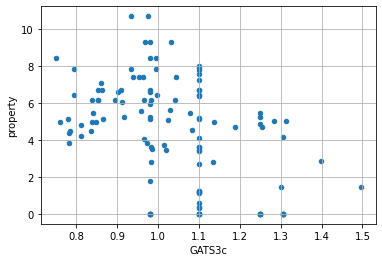

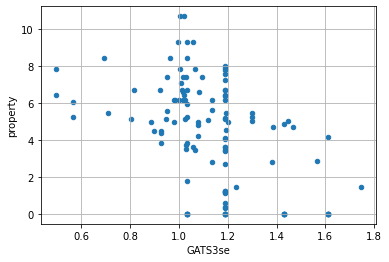

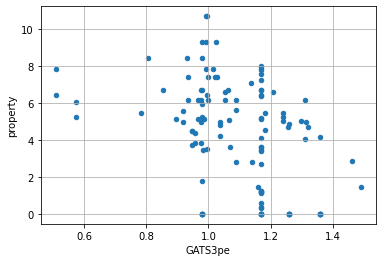

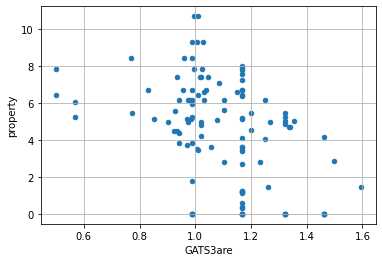

In [31]:
subreasonable_predicted_properties, subsignificant_fearures = cwf.find_correlating_features(subfeatures_df, targets, thresh=0.38, 
                                                                                      plot=True, corr_method="pearson", 
                                                                                      sig_metric="pearson", process_non_numeric=True, 
                                                                                      sig_level=0.05, significance=True, n_sample=5000)

In [32]:
log.info("{} {}".format(subreasonable_predicted_properties, len(subreasonable_predicted_properties)))
log.info("{} {}".format(subsignificant_fearures, len(subsignificant_fearures)))
use_significant = True
use_reasonable = False

['GATS3c', 'GATS3se', 'GATS3pe', 'GATS3are'] 4
['GATS3c', 'GATS3se', 'GATS3pe', 'GATS3are'] 4


In [35]:
catreasonable_predicted_properties, catsignificant_fearures = cwf.find_correlating_features(catfeatures_df, targets, thresh=0.6, 
                                                                                      plot=False, corr_method="pearson", 
                                                                                      sig_metric="pearson", process_non_numeric=True, 
                                                                                      sig_level=0.05, significance=True, n_sample=5000)

0      0.569810
1      1.761325
2      1.251493
3      5.229434
4      2.678563
         ...   
114    0.000000
115    0.000000
116    0.000000
117    0.000000
118    0.000000
Name: ddg, Length: 119, dtype: float64
Significance will be calculated for the correlations
VE3_A: 0.6258 P: 0.0002 Significant at 0.0500 level? True
ATS5Z: 0.6387 P: 0.0002 Significant at 0.0500 level? True
ATS5m: 0.6029 P: 0.0002 Significant at 0.0500 level? True
ATS5v: 0.6275 P: 0.0002 Significant at 0.0500 level? True
ATS6v: 0.6314 P: 0.0002 Significant at 0.0500 level? True
ATS6se: 0.6497 P: 0.0002 Significant at 0.0500 level? True
ATS7se: 0.6010 P: 0.0002 Significant at 0.0500 level? True
ATS6pe: 0.6526 P: 0.0002 Significant at 0.0500 level? True
ATS6are: 0.6521 P: 0.0002 Significant at 0.0500 level? True
ATS5p: 0.6058 P: 0.0002 Significant at 0.0500 level? True
ATS6p: 0.6368 P: 0.0002 Significant at 0.0500 level? True
ATS6i: 0.6498 P: 0.0002 Significant at 0.0500 level? True
ATS7i: 0.6109 P: 0.0002 Signifi

In [36]:
log.info("{} {}".format(catreasonable_predicted_properties, len(catreasonable_predicted_properties)))
log.info("{} {}".format(catsignificant_fearures, len(catsignificant_fearures)))
use_significant = True
use_reasonable = False

['VE3_A', 'ATS5Z', 'ATS5m', 'ATS5v', 'ATS6v', 'ATS6se', 'ATS7se', 'ATS6pe', 'ATS6are', 'ATS5p', 'ATS6p', 'ATS6i', 'ATS7i', 'ATSC3se', 'ATSC3are', 'PEOE_VSA6', 'GGI6'] 17
['VE3_A', 'ATS5Z', 'ATS5m', 'ATS5v', 'ATS6v', 'ATS6se', 'ATS7se', 'ATS6pe', 'ATS6are', 'ATS5p', 'ATS6p', 'ATS6i', 'ATS7i', 'ATSC3se', 'ATSC3are', 'PEOE_VSA6', 'GGI6'] 17


In [66]:
subfeats_df = pd.DataFrame()

if use_significant is True:
    for k in subsignificant_fearures:
        subfeats_df[k] = subfeatures_df[k]
        
elif use_reasonable is True:
    for k in subreasonable_predicted_properties:
        subfeats_df[k] = subfeatures_df[k]

In [67]:
catfeats_df = pd.DataFrame()

if use_significant is True:
    for k in catsignificant_fearures:
        catfeats_df[k] = catfeatures_df[k]
        
elif use_reasonable is True:
    for k in catreasonable_predicted_properties:
        catfeats_df[k] = catfeatures_df[k]

In [68]:
features_df = subfeats_df.join(catfeats_df, lsuffix="subfeats_df", rsuffix="catfeats_df")

In [69]:
features_df.to_csv("features.csv")

In [70]:
# NOTE: USER DEFINES THE LIST BELOW!!!!!! Put in the list column features that are categorical
catagorical_indxs = []
# and remove this from comment
# feature_columns = features_df.columns 

# USER Defines here as well!!!
feature_types = "no_catagorical"

# Backup
backup_feats_df = features_df.copy()

# None catagorical only scale the data as numbers
if feature_types == "no_catagorical":
    mm_scaler = MaxAbsScaler()
    features_df = mm_scaler.fit_transform(features_df)
    log.info(pd.DataFrame(features_df, columns=feature_columns))
    features_df = pd.DataFrame(features_df, columns=feature_columns)
    
# Some catagorical - Need to provide the indexes
elif feature_types == "some_catagorical":
    numeric_features = [feature_columns[i] for i in range(len(feature_columns)) if i not in catagorical_indxs]
    numerical_transformer = MaxAbsScaler()
    categorical_features = [feature_columns[i] for i in range(len(feature_columns)) if i in catagorical_indxs]
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    if any(ent in categorical_features for ent in numeric_features):
        log.warning("WARNING - numeric and catagorical feature specififed overlap")
        log.info(numeric_features)
        log.info(categorical_features)
    else:
        log.info("Numerical features:\n{} {}".format(numeric_features, len(numeric_features)))
        log.info("Catagorical features:\n{} {}".format(categorical_features, len(catagorical_indxs)))
    
    preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numeric_features),
        ('catagorical', categorical_transformer, categorical_features)])
    
    features_df = preprocessor.fit_transform(features_df)
    feature_names = cwf.get_feature_names_from_column_transformers(preprocessor)
    catagorical_indxs = [i for i in range(len(numeric_features), len(feature_names))]
    log.info(feature_names)

    log.info(pd.DataFrame(features_df, columns=feature_names))
    features_df = pd.DataFrame(features_df, columns=feature_names)
    log.info("catagorical indexes {}".format(catagorical_indxs))
    log.info("Catagorical features start on column name {} and end on {}".format(features_df.columns[catagorical_indxs[0]], features_df.columns[catagorical_indxs[-1]]))
    
# All catagorical
elif feature_types == "catagorical":
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    features_df = categorical_transformer.fit_transform(features_df).toarray()
    feature_names = [categorical_transformer.get_feature_names(feature_columns)]
    features_df = pd.DataFrame(features_df, columns=feature_names)
    log.info(features_df)

# No scaling or other encoding
else:
    log.info("No scaling")

       GATS3c   GATS3se   GATS3pe  GATS3are     VE3_A  ...     ATS7i  \
0    0.736385  0.680897  0.785682  0.732482  0.806281  ...  0.478232   
1    0.656137  0.591337  0.656844  0.621368  0.806281  ...  0.478232   
2    0.736385  0.680897  0.785682  0.732482  0.884618  ...  0.600311   
3    0.656137  0.591337  0.656844  0.621368  0.884618  ...  0.600311   
4    0.736385  0.680897  0.785682  0.732482  0.916517  ...  0.655409   
..        ...       ...       ...       ...       ...  ...       ...   
114  0.873887  0.924678  0.913129  0.917828  0.806281  ...  0.478232   
115  0.736385  0.680897  0.785682  0.732482  0.686178  ...  0.148247   
116  0.656137  0.591337  0.656844  0.621368  0.686178  ...  0.148247   
117  0.836295  0.820583  0.845336  0.830786  0.686178  ...  0.148247   
118  0.873887  0.924678  0.913129  0.917828  0.686178  ...  0.148247   

      ATSC3se  ATSC3are  PEOE_VSA6      GGI6  
0   -0.147241 -0.053115   0.206274  0.519553  
1   -0.147241 -0.053115   0.206274  0.519

In [76]:
# Possible source:    https://www.kaggle.com/ankitjha/comparing-regression-models

kfold_reg_names = ["LassoCV","KNeighborsRegressor", "DecisionTreeRegressor", "SVR", "BayesianRegr", "GaussianProcess Regressor"]
kfold_regressors = [
    LassoCV(random_state=random_seed, cv=10,selection='random',normalize=True,max_iter=1000000),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=random_seed),
    svm.SVR(),
    linear_model.BayesianRidge(n_iter=100000,normalize=True),
    GaussianProcessRegressor()]

kernel = DotProduct() + WhiteKernel()
kfold_regressors_parameters = {
    "LassoCV":{},
    "KNeighborsRegressor": {"n_neighbors": [ent for ent in range(2, 10, 1)]},
    "DecisionTreeRegressor": {"max_depth": [2, 3, 4, 5, 7, 10]},
    "SVR": {"kernel":['linear', 'poly', 'rbf'], "degree":[2,3], "gamma":['auto','scale'], "coef0":[0,1], 'C':[100]},    
    "BayesianRegr":{'alpha_1':[1e-06, 10], 'alpha_2': [1e-06,10],'lambda_1':[1e-06,10], 'lambda_2': [1e-06,10]},
    "GaussianProcess Regressor": {},  
  
}

In [77]:
%%capture
cwf.kfold_test_regressor_with_optimization(features_df,targets , kfold_regressors, kfold_regressors_parameters, scale=False, cv=5, n_repeats=10, rgs_names=kfold_reg_names)

Features: Index(['GATS3c', 'GATS3se', 'GATS3pe', 'GATS3are', 'VE3_A', 'ATS5Z', 'ATS5m',
       'ATS5v', 'ATS6v', 'ATS6se', 'ATS7se', 'ATS6pe', 'ATS6are', 'ATS5p',
       'ATS6p', 'ATS6i', 'ATS7i', 'ATSC3se', 'ATSC3are', 'PEOE_VSA6', 'GGI6'],
      dtype='object')
Starting regression

-----
Begin LassoCV
-----

Directory LassoCV already exists will be overwritten
----- LassoCV: Fold 0 -----
[1, 3, 9, 25, 26, 36, 47, 52, 65, 99, 107, 114]
	Train indx [  0   2   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  27  28  29  30  31  32  33  34  35  37  38  39  40  41
  42  43  44  45  46  48  49  50  51  53  54  55  56  57  58  59  60  61
  62  63  64  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
 100 101 102 103 104 105 106 108 109 110 111 112 113 115 116 117 118]
	Test indx: [  1   3   9  25  26  36  47  52  65  99 107 114]
	Best parameters; {}
	-0.4149 (+/-0.7206) for {}




	score (LassoCV): 0.5766188853714598
----- LassoCV: Fold 2 -----
[10, 13, 29, 30, 49, 55, 93, 95, 102, 103, 116, 118]
	Train indx [  0   1   2   3   4   5   6   7   8   9  11  12  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  50  51  52  53  54  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  94  96  97
  98  99 100 101 104 105 106 107 108 109 110 111 112 113 114 115 117]
	Test indx: [ 10  13  29  30  49  55  93  95 102 103 116 118]
	Best parameters; {}
	-0.1310 (+/-0.6685) for {}

	----- Predicting using: LassoCV -----
	Xtrain:        GATS3c   GATS3se   GATS3pe  GATS3are     VE3_A     ATS5Z     ATS5m  \
0    0.736385  0.680897  0.785682  0.732482  0.806281  0.673305  0.680661   
1    0.656137  0.591337  0.656844  0.621368  0.806281  0.673305  0.680661   
2    0.736385  0.680897  0.785682  0.732482


	score (LassoCV): 0.7231792949493525
----- LassoCV: Fold 4 -----
[2, 12, 23, 37, 40, 44, 56, 61, 79, 84, 85, 92]
	Train indx [  0   1   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18  19
  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  38  39
  41  42  43  45  46  47  48  49  50  51  52  53  54  55  57  58  59  60
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  80
  81  82  83  86  87  88  89  90  91  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118]
	Test indx: [ 2 12 23 37 40 44 56 61 79 84 85 92]
	Best parameters; {}
	-1.8649 (+/-3.7347) for {}

	----- Predicting using: LassoCV -----
	Xtrain:        GATS3c   GATS3se   GATS3pe  GATS3are     VE3_A     ATS5Z     ATS5m  \
0    0.736385  0.680897  0.785682  0.732482  0.806281  0.673305  0.680661   
1    0.656137  0.591337  0.656844  0.621368  0.806281  0.673305  0.680661   
3    0.656137  0.591337  0.656844  0.621368  0.884618  0.790


	score (LassoCV): 0.8634721097222291
----- LassoCV: Fold 6 -----
[14, 19, 27, 35, 43, 59, 60, 77, 105, 110, 112, 115]
	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18
  20  21  22  23  24  25  26  28  29  30  31  32  33  34  36  37  38  39
  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 106 107 108 109 111 113 114 116 117 118]
	Test indx: [ 14  19  27  35  43  59  60  77 105 110 112 115]
	Best parameters; {}
	-0.2228 (+/-0.6126) for {}

	----- Predicting using: LassoCV -----
	Xtrain:        GATS3c   GATS3se   GATS3pe  GATS3are     VE3_A     ATS5Z     ATS5m  \
0    0.736385  0.680897  0.785682  0.732482  0.806281  0.673305  0.680661   
1    0.656137  0.591337  0.656844  0.621368  0.806281  0.673305  0.680661   
2    0.736385  0.680897  0.785682  0.732482


	score (LassoCV): 0.7557715225354041
----- LassoCV: Fold 8 -----
[4, 5, 20, 34, 39, 41, 42, 83, 94, 97, 109, 117]
	Train indx [  0   1   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  21  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  40
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  84  85  86  87  88  89  90  91  92  93  95  96  98  99
 100 101 102 103 104 105 106 107 108 110 111 112 113 114 115 116 118]
	Test indx: [  4   5  20  34  39  41  42  83  94  97 109 117]
	Best parameters; {}
	-0.4592 (+/-0.9368) for {}

	----- Predicting using: LassoCV -----
	Xtrain:        GATS3c   GATS3se   GATS3pe  GATS3are     VE3_A     ATS5Z     ATS5m  \
0    0.736385  0.680897  0.785682  0.732482  0.806281  0.673305  0.680661   
1    0.656137  0.591337  0.656844  0.621368  0.806281  0.673305  0.680661   
2    0.736385  0.680897  0.785682  0.732482  0.


	score (LassoCV): 0.5679918298489438
The average scores are: 1.1950929314629501, and the std scores are: 0.37138346328163263

-----
Begin KNeighborsRegressor
-----

Directory KNeighborsRegressor already exists will be overwritten
----- KNeighborsRegressor: Fold 0 -----
[1, 3, 9, 25, 26, 36, 47, 52, 65, 99, 107, 114]
	Train indx [  0   2   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  27  28  29  30  31  32  33  34  35  37  38  39  40  41
  42  43  44  45  46  48  49  50  51  53  54  55  56  57  58  59  60  61
  62  63  64  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
 100 101 102 103 104 105 106 108 109 110 111 112 113 115 116 117 118]
	Test indx: [  1   3   9  25  26  36  47  52  65  99 107 114]
	Best parameters; {'n_neighbors': 5}
	-0.3433 (+/-0.4646) for {'n_neighbors': 2}
	-0.2921 (+/-0.4219) for {'n_neighbors': 3}
	-0.1714 (+/-0.2634) for {'n_neighbors': 4}
	-0


	----- Predicting using: KNeighborsRegressor -----
	Xtrain:        GATS3c   GATS3se   GATS3pe  GATS3are     VE3_A     ATS5Z     ATS5m  \
0    0.736385  0.680897  0.785682  0.732482  0.806281  0.673305  0.680661   
1    0.656137  0.591337  0.656844  0.621368  0.806281  0.673305  0.680661   
2    0.736385  0.680897  0.785682  0.732482  0.884618  0.790110  0.793992   
3    0.656137  0.591337  0.656844  0.621368  0.884618  0.790110  0.793992   
4    0.736385  0.680897  0.785682  0.732482  0.916517  0.835534  0.831089   
..        ...       ...       ...       ...       ...       ...       ...   
114  0.873887  0.924678  0.913129  0.917828  0.806281  0.673305  0.680661   
115  0.736385  0.680897  0.785682  0.732482  0.686178  0.445737  0.472149   
116  0.656137  0.591337  0.656844  0.621368  0.686178  0.445737  0.472149   
117  0.836295  0.820583  0.845336  0.830786  0.686178  0.445737  0.472149   
118  0.873887  0.924678  0.913129  0.917828  0.686178  0.445737  0.472149   

        ATS5v 


	score (KNeighborsRegressor): 0.3172956300268349
----- KNeighborsRegressor: Fold 3 -----
[7, 22, 31, 51, 66, 69, 72, 78, 88, 101, 106, 111]
	Train indx [  0   1   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  23  24  25  26  27  28  29  30  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  67  68  70  71  73  74  75  76  77  79
  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98
  99 100 102 103 104 105 107 108 109 110 112 113 114 115 116 117 118]
	Test indx: [  7  22  31  51  66  69  72  78  88 101 106 111]
	Best parameters; {'n_neighbors': 6}
	-0.5798 (+/-1.0552) for {'n_neighbors': 2}
	-0.4447 (+/-0.8904) for {'n_neighbors': 3}
	-0.4777 (+/-0.9899) for {'n_neighbors': 4}
	-0.3302 (+/-0.8061) for {'n_neighbors': 5}
	-0.3033 (+/-0.8456) for {'n_neighbors': 6}
	-0.4193 (+/-1.0014) for {'n_neighbors': 7}
	-0.4442 (+/-1.0609) for {'n_neighbors': 8}
	-0.4


	score (KNeighborsRegressor): 0.06025562506020343
----- KNeighborsRegressor: Fold 5 -----
[0, 8, 11, 28, 53, 64, 73, 80, 86, 90, 104, 108]
	Train indx [  1   2   3   4   5   6   7   9  10  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  54  55  56  57  58
  59  60  61  62  63  65  66  67  68  69  70  71  72  74  75  76  77  78
  79  81  82  83  84  85  87  88  89  91  92  93  94  95  96  97  98  99
 100 101 102 103 105 106 107 109 110 111 112 113 114 115 116 117 118]
	Test indx: [  0   8  11  28  53  64  73  80  86  90 104 108]
	Best parameters; {'n_neighbors': 6}
	-0.6186 (+/-0.8948) for {'n_neighbors': 2}
	-0.4667 (+/-0.7289) for {'n_neighbors': 3}
	-0.4234 (+/-0.5819) for {'n_neighbors': 4}
	-0.3915 (+/-0.6384) for {'n_neighbors': 5}
	-0.3605 (+/-0.7135) for {'n_neighbors': 6}
	-0.4108 (+/-0.8403) for {'n_neighbors': 7}
	-0.4602 (+/-0.9185) for {'n_neighbors': 8}
	-0.48


	score (KNeighborsRegressor): 0.8605798469191863
----- KNeighborsRegressor: Fold 7 -----
[15, 16, 24, 45, 48, 63, 68, 76, 82, 87, 89, 113]
	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  17  18  19
  20  21  22  23  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  46  47  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  64  65  66  67  69  70  71  72  73  74  75  77  78  79
  80  81  83  84  85  86  88  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 114 115 116 117 118]
	Test indx: [ 15  16  24  45  48  63  68  76  82  87  89 113]
	Best parameters; {'n_neighbors': 2}
	-0.5218 (+/-1.0378) for {'n_neighbors': 2}
	-0.6326 (+/-1.1731) for {'n_neighbors': 3}
	-0.7857 (+/-1.2008) for {'n_neighbors': 4}
	-0.6631 (+/-1.0555) for {'n_neighbors': 5}
	-0.6199 (+/-0.9714) for {'n_neighbors': 6}
	-0.7170 (+/-1.1375) for {'n_neighbors': 7}
	-0.7633 (+/-1.3137) for {'n_neighbors': 8}
	-0.84


	score (KNeighborsRegressor): 0.5749021560803846
----- KNeighborsRegressor: Fold 9 -----
[17, 32, 38, 54, 58, 62, 74, 75, 91, 96, 100]
	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  33  34  35  36  37
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  55  56  57
  59  60  61  63  64  65  66  67  68  69  70  71  72  73  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  92  93  94  95  97  98  99
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118]
	Test indx: [ 17  32  38  54  58  62  74  75  91  96 100]
	Best parameters; {'n_neighbors': 2}
	-0.4644 (+/-1.0453) for {'n_neighbors': 2}
	-0.5244 (+/-1.0014) for {'n_neighbors': 3}
	-0.4915 (+/-0.8104) for {'n_neighbors': 4}
	-0.5150 (+/-0.8322) for {'n_neighbors': 5}
	-0.5218 (+/-0.8822) for {'n_neighbors': 6}
	-0.6942 (+/-1.1077) for {'n_neighbors': 7}
	-0.7530 (+/-1.2744) for {'n_neighbors': 8}
	-0.6903 (


	score (DecisionTreeRegressor): 0.8339138525228793
----- DecisionTreeRegressor: Fold 1 -----
[6, 18, 21, 33, 46, 50, 57, 67, 70, 71, 81, 98]
	Train indx [  0   1   2   3   4   5   7   8   9  10  11  12  13  14  15  16  17  19
  20  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39
  40  41  42  43  44  45  47  48  49  51  52  53  54  55  56  58  59  60
  61  62  63  64  65  66  68  69  72  73  74  75  76  77  78  79  80  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118]
	Test indx: [ 6 18 21 33 46 50 57 67 70 71 81 98]
	Best parameters; {'max_depth': 2}
	-1.2100 (+/-1.7594) for {'max_depth': 2}
	-1.5113 (+/-2.2871) for {'max_depth': 3}
	-1.9395 (+/-2.7167) for {'max_depth': 4}
	-1.4822 (+/-2.1828) for {'max_depth': 5}
	-1.7977 (+/-2.4774) for {'max_depth': 7}
	-2.1016 (+/-2.6241) for {'max_depth': 10}

	----- Predicting using: DecisionTreeRegressor -----
	Xtrain:        GAT


	score (DecisionTreeRegressor): 0.38886562580880246
----- DecisionTreeRegressor: Fold 3 -----
[7, 22, 31, 51, 66, 69, 72, 78, 88, 101, 106, 111]
	Train indx [  0   1   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  23  24  25  26  27  28  29  30  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  67  68  70  71  73  74  75  76  77  79
  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98
  99 100 102 103 104 105 107 108 109 110 112 113 114 115 116 117 118]
	Test indx: [  7  22  31  51  66  69  72  78  88 101 106 111]
	Best parameters; {'max_depth': 3}
	-0.4775 (+/-0.9951) for {'max_depth': 2}
	-0.1914 (+/-0.7177) for {'max_depth': 3}
	-0.3548 (+/-0.8540) for {'max_depth': 4}
	-0.5252 (+/-1.1255) for {'max_depth': 5}
	-0.4606 (+/-0.6888) for {'max_depth': 7}
	-0.4429 (+/-0.5726) for {'max_depth': 10}

	----- Predicting using: DecisionTreeRegressor -----
	Xt


	score (DecisionTreeRegressor): -0.17187906155668942
----- DecisionTreeRegressor: Fold 5 -----
[0, 8, 11, 28, 53, 64, 73, 80, 86, 90, 104, 108]
	Train indx [  1   2   3   4   5   6   7   9  10  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  54  55  56  57  58
  59  60  61  62  63  65  66  67  68  69  70  71  72  74  75  76  77  78
  79  81  82  83  84  85  87  88  89  91  92  93  94  95  96  97  98  99
 100 101 102 103 105 106 107 109 110 111 112 113 114 115 116 117 118]
	Test indx: [  0   8  11  28  53  64  73  80  86  90 104 108]
	Best parameters; {'max_depth': 4}
	-0.6046 (+/-1.4110) for {'max_depth': 2}
	-0.1324 (+/-0.4961) for {'max_depth': 3}
	-0.0867 (+/-0.1751) for {'max_depth': 4}
	-0.2975 (+/-0.2016) for {'max_depth': 5}
	-0.2312 (+/-0.3302) for {'max_depth': 7}
	-0.2067 (+/-0.3434) for {'max_depth': 10}

	----- Predicting using: DecisionTreeRegressor -----
	Xtr


	score (DecisionTreeRegressor): 0.8941686000812212
----- DecisionTreeRegressor: Fold 7 -----
[15, 16, 24, 45, 48, 63, 68, 76, 82, 87, 89, 113]
	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  17  18  19
  20  21  22  23  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  46  47  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  64  65  66  67  69  70  71  72  73  74  75  77  78  79
  80  81  83  84  85  86  88  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 114 115 116 117 118]
	Test indx: [ 15  16  24  45  48  63  68  76  82  87  89 113]
	Best parameters; {'max_depth': 2}
	-0.2231 (+/-0.7817) for {'max_depth': 2}
	-0.5099 (+/-1.1375) for {'max_depth': 3}
	-0.4339 (+/-0.9126) for {'max_depth': 4}
	-0.5047 (+/-1.0322) for {'max_depth': 5}
	-0.4601 (+/-1.0305) for {'max_depth': 7}
	-0.5049 (+/-1.0006) for {'max_depth': 10}

	----- Predicting using: DecisionTreeRegressor -----
	Xtra


	score (DecisionTreeRegressor): 0.5642647030721331
----- DecisionTreeRegressor: Fold 9 -----
[17, 32, 38, 54, 58, 62, 74, 75, 91, 96, 100]
	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  33  34  35  36  37
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  55  56  57
  59  60  61  63  64  65  66  67  68  69  70  71  72  73  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  92  93  94  95  97  98  99
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118]
	Test indx: [ 17  32  38  54  58  62  74  75  91  96 100]
	Best parameters; {'max_depth': 2}
	-0.2021 (+/-0.7387) for {'max_depth': 2}
	-0.2957 (+/-0.9870) for {'max_depth': 3}
	-0.3378 (+/-0.7852) for {'max_depth': 4}
	-0.5739 (+/-0.7108) for {'max_depth': 5}
	-0.4232 (+/-0.8442) for {'max_depth': 7}
	-0.4989 (+/-0.8349) for {'max_depth': 10}

	----- Predicting using: DecisionTreeRegressor -----
	Xtrain: 

	-3.9141 (+/-7.1163) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
	-0.5137 (+/-1.0188) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
	-0.9485 (+/-1.4285) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
	-0.0386 (+/-0.2194) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
	0.0986 (+/-0.2689) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
	-0.9485 (+/-1.4285) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
	-5.0656 (+/-7.9169) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
	-0.5137 (+/-1.0188) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
	-0.9485 (+/-1.4285) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	0.0628 (+/-0.3559) for {'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	0.0986 (+/-0.2689) for {'C': 100,

	Best parameters; {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	-2.5069 (+/-4.3538) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	-0.6594 (+/-1.4026) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	-0.7546 (+/-2.0230) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-2.5069 (+/-4.3538) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
	-7.2611 (+/-14.3209) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
	-1.3735 (+/-3.3248) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
	-2.5069 (+/-4.3538) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
	-0.6727 (+/-1.3051) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
	-0.7546 (+/-2.0230) for {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
	-2.5069 (+/-4.3538) for {'C': 100, 'coe


	score (SVR): 0.46264863671099243
----- SVR: Fold 2 -----
[10, 13, 29, 30, 49, 55, 93, 95, 102, 103, 116, 118]
	Train indx [  0   1   2   3   4   5   6   7   8   9  11  12  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  50  51  52  53  54  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  94  96  97
  98  99 100 101 104 105 106 107 108 109 110 111 112 113 114 115 117]
	Test indx: [ 10  13  29  30  49  55  93  95 102 103 116 118]
	Best parameters; {'C': 100, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
	-0.2629 (+/-0.6128) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	0.2627 (+/-0.2601) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	0.2505 (+/-0.3762) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-0


	score (SVR): 0.4455310694743878
----- SVR: Fold 3 -----
[7, 22, 31, 51, 66, 69, 72, 78, 88, 101, 106, 111]
	Train indx [  0   1   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  23  24  25  26  27  28  29  30  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  67  68  70  71  73  74  75  76  77  79
  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98
  99 100 102 103 104 105 107 108 109 110 112 113 114 115 116 117 118]
	Test indx: [  7  22  31  51  66  69  72  78  88 101 106 111]
	Best parameters; {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-0.1787 (+/-0.7703) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	0.1657 (+/-0.3122) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	0.2162 (+/-0.3662) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-0.178


	score (SVR): 0.6627828907305897
----- SVR: Fold 4 -----
[2, 12, 23, 37, 40, 44, 56, 61, 79, 84, 85, 92]
	Train indx [  0   1   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18  19
  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  38  39
  41  42  43  45  46  47  48  49  50  51  52  53  54  55  57  58  59  60
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  80
  81  82  83  86  87  88  89  90  91  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118]
	Test indx: [ 2 12 23 37 40 44 56 61 79 84 85 92]
	Best parameters; {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
	-1.3340 (+/-2.6200) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	-0.6224 (+/-1.4195) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	-0.6594 (+/-1.8621) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-1.3340 (+/-2.6200


	score (SVR): 0.21997054915375358
----- SVR: Fold 5 -----
[0, 8, 11, 28, 53, 64, 73, 80, 86, 90, 104, 108]
	Train indx [  1   2   3   4   5   6   7   9  10  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  54  55  56  57  58
  59  60  61  62  63  65  66  67  68  69  70  71  72  74  75  76  77  78
  79  81  82  83  84  85  87  88  89  91  92  93  94  95  96  97  98  99
 100 101 102 103 105 106 107 109 110 111 112 113 114 115 116 117 118]
	Test indx: [  0   8  11  28  53  64  73  80  86  90 104 108]
	Best parameters; {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	-0.4191 (+/-0.6179) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	0.0363 (+/-0.3227) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	0.0123 (+/-0.6148) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-0.419


	score (SVR): 0.5553898798244744
----- SVR: Fold 6 -----
[14, 19, 27, 35, 43, 59, 60, 77, 105, 110, 112, 115]
	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18
  20  21  22  23  24  25  26  28  29  30  31  32  33  34  36  37  38  39
  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 106 107 108 109 111 113 114 116 117 118]
	Test indx: [ 14  19  27  35  43  59  60  77 105 110 112 115]
	Best parameters; {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-0.7066 (+/-1.0912) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	0.0892 (+/-0.2811) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	0.1103 (+/-0.3468) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-0.7


	score (SVR): 0.8824889506845799
----- SVR: Fold 7 -----
[15, 16, 24, 45, 48, 63, 68, 76, 82, 87, 89, 113]
	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  17  18  19
  20  21  22  23  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  46  47  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  64  65  66  67  69  70  71  72  73  74  75  77  78  79
  80  81  83  84  85  86  88  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 114 115 116 117 118]
	Test indx: [ 15  16  24  45  48  63  68  76  82  87  89 113]
	Best parameters; {'C': 100, 'coef0': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
	-0.5892 (+/-1.1883) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	-0.1917 (+/-0.6386) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	-0.1635 (+/-0.8786) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-0.5


	score (SVR): 0.6842301636721408
----- SVR: Fold 8 -----
[4, 5, 20, 34, 39, 41, 42, 83, 94, 97, 109, 117]
	Train indx [  0   1   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  21  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  40
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  84  85  86  87  88  89  90  91  92  93  95  96  98  99
 100 101 102 103 104 105 106 107 108 110 111 112 113 114 115 116 118]
	Test indx: [  4   5  20  34  39  41  42  83  94  97 109 117]
	Best parameters; {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-0.9174 (+/-1.3392) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	-0.0095 (+/-0.4125) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	0.0093 (+/-0.6379) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-0.9174


	score (SVR): 0.5286065984696838
----- SVR: Fold 9 -----
[17, 32, 38, 54, 58, 62, 74, 75, 91, 96, 100]
	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  33  34  35  36  37
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  55  56  57
  59  60  61  63  64  65  66  67  68  69  70  71  72  73  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  92  93  94  95  97  98  99
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118]
	Test indx: [ 17  32  38  54  58  62  74  75  91  96 100]
	Best parameters; {'C': 100, 'coef0': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
	-0.3863 (+/-1.0972) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
	-0.1077 (+/-0.5913) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
	-0.0908 (+/-0.8106) for {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
	-0.3863 


	score (SVR): 0.5545784680367547
The average scores are: 1.2170257922473664, and the std scores are: 0.2626241454464358

-----
Begin BayesianRegr
-----

----- BayesianRegr: Fold 0 -----
[1, 3, 9, 25, 26, 36, 47, 52, 65, 99, 107, 114]
	Train indx [  0   2   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  27  28  29  30  31  32  33  34  35  37  38  39  40  41
  42  43  44  45  46  48  49  50  51  53  54  55  56  57  58  59  60  61
  62  63  64  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
 100 101 102 103 104 105 106 108 109 110 111 112 113 115 116 117 118]
	Test indx: [  1   3   9  25  26  36  47  52  65  99 107 114]
	Best parameters; {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.1494 (+/-0.6464) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.1801 (+/-0.7068) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lam


	score (BayesianRegr): 0.8649398181224797
----- BayesianRegr: Fold 1 -----
[6, 18, 21, 33, 46, 50, 57, 67, 70, 71, 81, 98]
	Train indx [  0   1   2   3   4   5   7   8   9  10  11  12  13  14  15  16  17  19
  20  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39
  40  41  42  43  44  45  47  48  49  51  52  53  54  55  56  58  59  60
  61  62  63  64  65  66  68  69  72  73  74  75  76  77  78  79  80  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118]
	Test indx: [ 6 18 21 33 46 50 57 67 70 71 81 98]
	Best parameters; {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 10, 'lambda_2': 10}
	-1.5847 (+/-3.2413) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-1.6585 (+/-3.3873) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 10}
	-4.6619 (+/-9.1538) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 1e-06}
	

[10, 13, 29, 30, 49, 55, 93, 95, 102, 103, 116, 118]
	Train indx [  0   1   2   3   4   5   6   7   8   9  11  12  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  50  51  52  53  54  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  94  96  97
  98  99 100 101 104 105 106 107 108 109 110 111 112 113 114 115 117]
	Test indx: [ 10  13  29  30  49  55  93  95 102 103 116 118]
	Best parameters; {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 10, 'lambda_2': 10}
	-0.2869 (+/-0.7852) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.2907 (+/-0.7894) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 10}
	-1.0753 (+/-1.5754) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 1e-06}
	-0.1103 (+/-0.4345) for {'alpha_1': 1e-06, 'alpha_2': 1e-06

[7, 22, 31, 51, 66, 69, 72, 78, 88, 101, 106, 111]
	Train indx [  0   1   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  23  24  25  26  27  28  29  30  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  67  68  70  71  73  74  75  76  77  79
  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98
  99 100 102 103 104 105 107 108 109 110 112 113 114 115 116 117 118]
	Test indx: [  7  22  31  51  66  69  72  78  88 101 106 111]
	Best parameters; {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.1709 (+/-0.7956) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.2022 (+/-0.8531) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 10}
	-1.1504 (+/-2.0572) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 1e-06}
	-0.1670 (+/-0.5235) for {'alpha_1': 1e-06, 'alpha_2': 1

[2, 12, 23, 37, 40, 44, 56, 61, 79, 84, 85, 92]
	Train indx [  0   1   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18  19
  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  38  39
  41  42  43  45  46  47  48  49  50  51  52  53  54  55  57  58  59  60
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  80
  81  82  83  86  87  88  89  90  91  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118]
	Test indx: [ 2 12 23 37 40 44 56 61 79 84 85 92]
	Best parameters; {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 10, 'lambda_2': 10}
	-1.9700 (+/-4.4851) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-1.9998 (+/-4.5447) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 10}
	-4.5591 (+/-8.4485) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 1e-06}
	-1.2908 (+/-2.3081) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10,

	Train indx [  1   2   3   4   5   6   7   9  10  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  54  55  56  57  58
  59  60  61  62  63  65  66  67  68  69  70  71  72  74  75  76  77  78
  79  81  82  83  84  85  87  88  89  91  92  93  94  95  96  97  98  99
 100 101 102 103 105 106 107 109 110 111 112 113 114 115 116 117 118]
	Test indx: [  0   8  11  28  53  64  73  80  86  90 104 108]
	Best parameters; {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.1958 (+/-0.7090) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.2072 (+/-0.7275) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 10}
	-1.5739 (+/-2.6427) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 1e-06}
	-0.2822 (+/-0.5209) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 10}
	-0.1748 (+/-

	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18
  20  21  22  23  24  25  26  28  29  30  31  32  33  34  36  37  38  39
  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 106 107 108 109 111 113 114 116 117 118]
	Test indx: [ 14  19  27  35  43  59  60  77 105 110 112 115]
	Best parameters; {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 10}
	-0.1988 (+/-0.5267) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.2327 (+/-0.5864) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 10}
	-1.2224 (+/-1.8510) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 1e-06}
	-0.1786 (+/-0.3983) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 10}
	-0.1794 (+/-0.5

	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  17  18  19
  20  21  22  23  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  46  47  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  64  65  66  67  69  70  71  72  73  74  75  77  78  79
  80  81  83  84  85  86  88  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 114 115 116 117 118]
	Test indx: [ 15  16  24  45  48  63  68  76  82  87  89 113]
	Best parameters; {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.4593 (+/-1.2894) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.4809 (+/-1.3316) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 10}
	-2.1697 (+/-3.9154) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 1e-06}
	-0.5399 (+/-1.0031) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 10}
	-0.4420 (+/-

	Train indx [  0   1   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  21  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  40
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  84  85  86  87  88  89  90  91  92  93  95  96  98  99
 100 101 102 103 104 105 106 107 108 110 111 112 113 114 115 116 118]
	Test indx: [  4   5  20  34  39  41  42  83  94  97 109 117]
	Best parameters; {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.3141 (+/-0.9404) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.3423 (+/-0.9953) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 10}
	-1.6432 (+/-3.2915) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 1e-06}
	-0.3311 (+/-0.6560) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 10}
	-0.2776 (+/-

	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  33  34  35  36  37
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  55  56  57
  59  60  61  63  64  65  66  67  68  69  70  71  72  73  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  92  93  94  95  97  98  99
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118]
	Test indx: [ 17  32  38  54  58  62  74  75  91  96 100]
	Best parameters; {'alpha_1': 1e-06, 'alpha_2': 10, 'lambda_1': 10, 'lambda_2': 10}
	-0.5167 (+/-1.4407) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-06}
	-0.5473 (+/-1.5012) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 10}
	-2.2318 (+/-4.3319) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 1e-06}
	-0.4520 (+/-1.0199) for {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 10, 'lambda_2': 10}
	-0.4721 (+/-1.3618


-----
Begin GaussianProcess Regressor
-----

----- GaussianProcess_Regressor: Fold 0 -----
[1, 3, 9, 25, 26, 36, 47, 52, 65, 99, 107, 114]
	Train indx [  0   2   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  27  28  29  30  31  32  33  34  35  37  38  39  40  41
  42  43  44  45  46  48  49  50  51  53  54  55  56  57  58  59  60  61
  62  63  64  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
 100 101 102 103 104 105 106 108 109 110 111 112 113 115 116 117 118]
	Test indx: [  1   3   9  25  26  36  47  52  65  99 107 114]
	Best parameters; {}
	-15869.5422 (+/-23327.9497) for {}

	----- Predicting using: GaussianProcess_Regressor -----
	Xtrain:        GATS3c   GATS3se   GATS3pe  GATS3are     VE3_A     ATS5Z     ATS5m  \
0    0.736385  0.680897  0.785682  0.732482  0.806281  0.673305  0.680661   
2    0.736385  0.680897  0.785682  0.732482  0.884618  0.790110  0.793992


	score (GaussianProcess_Regressor): -52317.96133753862
----- GaussianProcess_Regressor: Fold 2 -----
[10, 13, 29, 30, 49, 55, 93, 95, 102, 103, 116, 118]
	Train indx [  0   1   2   3   4   5   6   7   8   9  11  12  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  50  51  52  53  54  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  94  96  97
  98  99 100 101 104 105 106 107 108 109 110 111 112 113 114 115 117]
	Test indx: [ 10  13  29  30  49  55  93  95 102 103 116 118]
	Best parameters; {}
	-9853.4428 (+/-11831.1363) for {}

	----- Predicting using: GaussianProcess_Regressor -----
	Xtrain:        GATS3c   GATS3se   GATS3pe  GATS3are     VE3_A     ATS5Z     ATS5m  \
0    0.736385  0.680897  0.785682  0.732482  0.806281  0.673305  0.680661   
1    0.656137  0.591337  0.656844  0.621368  0.806281  0.67


	score (GaussianProcess_Regressor): -61.568072536471995
----- GaussianProcess_Regressor: Fold 4 -----
[2, 12, 23, 37, 40, 44, 56, 61, 79, 84, 85, 92]
	Train indx [  0   1   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18  19
  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  38  39
  41  42  43  45  46  47  48  49  50  51  52  53  54  55  57  58  59  60
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  80
  81  82  83  86  87  88  89  90  91  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118]
	Test indx: [ 2 12 23 37 40 44 56 61 79 84 85 92]
	Best parameters; {}
	-6386.1582 (+/-7328.2073) for {}

	----- Predicting using: GaussianProcess_Regressor -----
	Xtrain:        GATS3c   GATS3se   GATS3pe  GATS3are     VE3_A     ATS5Z     ATS5m  \
0    0.736385  0.680897  0.785682  0.732482  0.806281  0.673305  0.680661   
1    0.656137  0.591337  0.656844  0.621368  0.806281  0.673305  0.680661   


	score (GaussianProcess_Regressor): -70.17610787424273
----- GaussianProcess_Regressor: Fold 6 -----
[14, 19, 27, 35, 43, 59, 60, 77, 105, 110, 112, 115]
	Train indx [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18
  20  21  22  23  24  25  26  28  29  30  31  32  33  34  36  37  38  39
  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 106 107 108 109 111 113 114 116 117 118]
	Test indx: [ 14  19  27  35  43  59  60  77 105 110 112 115]
	Best parameters; {}
	-21245.2542 (+/-31634.6855) for {}

	----- Predicting using: GaussianProcess_Regressor -----
	Xtrain:        GATS3c   GATS3se   GATS3pe  GATS3are     VE3_A     ATS5Z     ATS5m  \
0    0.736385  0.680897  0.785682  0.732482  0.806281  0.673305  0.680661   
1    0.656137  0.591337  0.656844  0.621368  0.806281  0.6


	score (GaussianProcess_Regressor): -821.0813143760756
----- GaussianProcess_Regressor: Fold 8 -----
[4, 5, 20, 34, 39, 41, 42, 83, 94, 97, 109, 117]
	Train indx [  0   1   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  21  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  40
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  84  85  86  87  88  89  90  91  92  93  95  96  98  99
 100 101 102 103 104 105 106 107 108 110 111 112 113 114 115 116 118]
	Test indx: [  4   5  20  34  39  41  42  83  94  97 109 117]
	Best parameters; {}
	-7473.1883 (+/-8745.8567) for {}

	----- Predicting using: GaussianProcess_Regressor -----
	Xtrain:        GATS3c   GATS3se   GATS3pe  GATS3are     VE3_A     ATS5Z     ATS5m  \
0    0.736385  0.680897  0.785682  0.732482  0.806281  0.673305  0.680661   
1    0.656137  0.591337  0.656844  0.621368  0.806281  0.673305 


	score (GaussianProcess_Regressor): -2580.249475682101
The average scores are: 33.06480608944341, and the std scores are: 38.60056787073797


In [83]:
directory_names = cwf.directory_names(kfold_reg_names)

In [84]:
directory_names

['LassoCV',
 'KNeighborsRegressor',
 'DecisionTreeRegressor',
 'SVR',
 'BayesianRegr',
 'GaussianProcess_Regressor']

In [85]:
directory_names[0]

'LassoCV'

In [86]:
data = cwf.build_data_from_directory_regr(directory_names[0], max_folds=10)

Reading 0.csv
Reading 1.csv
Reading 2.csv
Reading 3.csv
Reading 4.csv
Reading 5.csv
Reading 6.csv
Reading 7.csv
Reading 8.csv
Reading 9.csv


In [87]:
data

,known,prediction
index,,
0,0.569810,1.467561
1,1.761325,1.760173
2,1.251493,4.136916
3,5.229434,4.671651
4,2.678563,3.406851
...,...,...
114,0.000000,0.399513
115,0.000000,0.033066
116,0.000000,-2.375323



-----
Analyzing predictions for model LassoCV
-----
Reading 0.csv
Reading 1.csv
Reading 2.csv
Reading 3.csv
Reading 4.csv
Reading 5.csv
Reading 6.csv
Reading 7.csv
Reading 8.csv
Reading 9.csv

-----
 Scores for Regressor: Explained Variance: 0.7063606026949023, MAE: 1.1944219352430538, MSE: 2.3751088043785886,R2: 0.7060942981870404
-----


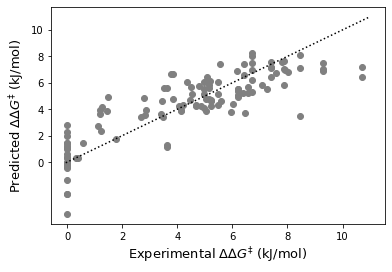


-----
Analyzing predictions for model KNeighborsRegressor
-----
Reading 0.csv
Reading 1.csv
Reading 2.csv
Reading 3.csv
Reading 4.csv
Reading 5.csv
Reading 6.csv
Reading 7.csv
Reading 8.csv
Reading 9.csv

-----
 Scores for Regressor: Explained Variance: 0.6738490477931547, MAE: 1.2574339577751634, MSE: 2.7312183232519667,R2: 0.6620278462106902
-----


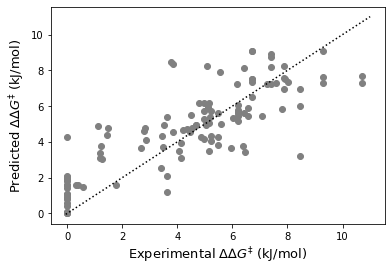


-----
Analyzing predictions for model DecisionTreeRegressor
-----
Reading 0.csv
Reading 1.csv
Reading 2.csv
Reading 3.csv
Reading 4.csv
Reading 5.csv
Reading 6.csv
Reading 7.csv
Reading 8.csv
Reading 9.csv

-----
 Scores for Regressor: Explained Variance: 0.6648855888669574, MAE: 1.238994553438112, MSE: 2.7082018017233667,R2: 0.6648760049563802
-----


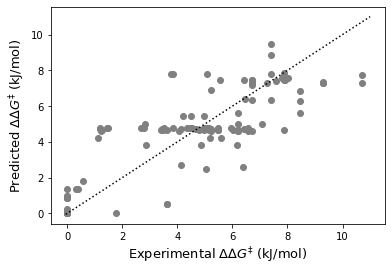


-----
Analyzing predictions for model SVR
-----
Reading 0.csv
Reading 1.csv
Reading 2.csv
Reading 3.csv
Reading 4.csv
Reading 5.csv
Reading 6.csv
Reading 7.csv
Reading 8.csv
Reading 9.csv

-----
 Scores for Regressor: Explained Variance: 0.6800345690923484, MAE: 1.2169172496341893, MSE: 2.591579269416149,R2: 0.6793073552767397
-----


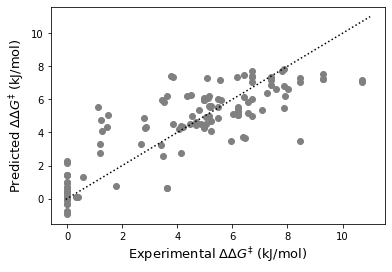


-----
Analyzing predictions for model BayesianRegr
-----
Reading 0.csv
Reading 1.csv
Reading 2.csv
Reading 3.csv
Reading 4.csv
Reading 5.csv
Reading 6.csv
Reading 7.csv
Reading 8.csv
Reading 9.csv

-----
 Scores for Regressor: Explained Variance: 0.6559572982487507, MAE: 1.3063951554045516, MSE: 2.7808264774027722,R2: 0.6558891298140102
-----


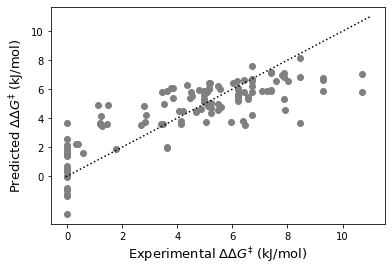


-----
Analyzing predictions for model GaussianProcess_Regressor
-----
Reading 0.csv
Reading 1.csv
Reading 2.csv
Reading 3.csv
Reading 4.csv
Reading 5.csv
Reading 6.csv
Reading 7.csv
Reading 8.csv
Reading 9.csv

-----
 Scores for Regressor: Explained Variance: -2436.3767902274835, MAE: 33.00581611678772, MSE: 19761.55696319405,R2: -2444.3760844459125
-----


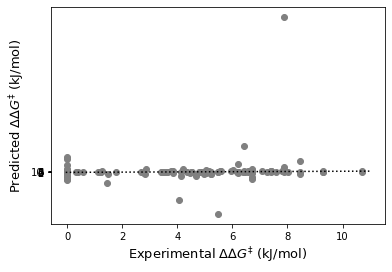

In [88]:
cwf.metrics_for_regression(directories=directory_names)

# Now first we split 90%-10% (train-test)


In [89]:
data = pd.read_csv("first_set_full.csv")
data.columns = ["_".join(ent.lower().strip().split(" ")) for ent in data.columns]

In [90]:
test_reactions = [49, 33, 19, 1, 6, 51, 66, 47, 58]

In [91]:
reaction = data["reaction"]
log.info("Reaction Number: {}".format(reaction.head()))

Reaction Number: 0    0
1    1
2    2
3    3
4    4
Name: reaction, dtype: int64


In [92]:
train_data = data.drop(labels =test_reactions, axis=0,inplace = False)

In [93]:
test_data = pd.DataFrame()
test_data = data.iloc[test_reactions]

In [94]:
substratesmiles_train = train_data["substrate"]
log.info("Substrate SMILES: {}".format(substratesmiles_train.head()))

catalystsmiles_train = train_data["catalyst"]
log.info("Catalyst SMILES: {}".format(catalystsmiles_train.head()))

ddg_train = train_data["ddg"]
log.info("DGG: {}".format(ddg_train.head()))

Substrate SMILES: 0         CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2
2         CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2
3    C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3
4         CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2
5    C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3
Name: substrate, dtype: object
Catalyst SMILES: 0    CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...
2    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
3    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
4    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
5    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
Name: catalyst, dtype: object
DGG: 0    0.569810
2    1.251493
3    5.229434
4    2.678563
5    5.952686
Name: ddg, dtype: float64


In [95]:
target_train = ddg_train

In [96]:
substratesmiles_test = test_data["substrate"]
log.info("Substrate SMILES: {}".format(substratesmiles_test.head()))

catalystsmiles_test = test_data["catalyst"]
log.info("Catalyst SMILES: {}".format(catalystsmiles_test.head()))

ddg_test = test_data["ddg"]
log.info("DGG: {}".format(ddg_test.head()))

Substrate SMILES: 49     COC(C=C1)=CC=C1/C=N/C(C2=CC=CC=C2)C3=CC=CC=C3
33                 C=CC/N=C(C)/C1=CC(C=CC=C2)=C2C=C1
19    N#CC(C=C1)=CC=C1/C=N/C(C2=CC=CC=C2)C3=CC=CC=C3
1        C(C1=CC=CC=C1)(C2=CC=CC=C2)/N=C/C3=CC=CC=C3
6             CC(C)(C)/C=N/C(C1=CC=CC=C1)C2=CC=CC=C2
Name: substrate, dtype: object
Catalyst SMILES: 49    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
33    O=C([C@@H](C(C)(C)C)NC(N[C@@H]1[C@@H](/N=C/C2=...
19    CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
1     CN(C)C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(...
6     CN(C([C@@H](C(C)(C)C)NC(NC1=CC(C(F)(F)F)=CC(C(...
Name: catalyst, dtype: object
DGG: 49    7.867979
33    4.685297
19    6.705437
1     1.761325
6     4.125533
Name: ddg, dtype: float64


In [97]:
target_test = ddg_test

Mordred for substrates trainset

In [99]:
calc = Calculator(descriptors, ignore_3D=False)
submolecule_list_train = [mi.get_mol_from_smiles(s) for s in substratesmiles_train]
subfeatures_df_train = calc.pandas(submolecule_list_train)

100%|██████████| 110/110 [00:14<00:00,  7.39it/s]


In [100]:
subfeatures_df_train.dropna(inplace=True, thresh=int(0.9*len(subfeatures_df_train.index)))
threshold = 0.5
subfeatures_df_train.drop(subfeatures_df_train.std()[subfeatures_df_train.std() < threshold].index.values, axis=1)
subfeatures_df_train.columns = [ent.strip() for ent in subfeatures_df_train.columns]
subfeatures_df_train.head()

/Users/matina/miniconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,14.538011,12.482550,0,0,23.734067,2.345955,4.691910,23.734067,1.249161,3.853399,...,9.625162,51.858564,251.1674,6.279185,706,24,94.0,104.0,6.395833,4.180556
1,14.538011,12.482550,0,0,23.734067,2.345955,4.691910,23.734067,1.249161,3.853399,...,9.625162,51.858564,251.1674,6.279185,706,24,94.0,104.0,6.395833,4.180556
2,16.182576,12.923224,0,0,28.376768,2.343528,4.687055,28.376768,1.351275,3.966671,...,9.687009,54.282362,271.1361,7.135161,958,28,104.0,118.0,4.694444,4.805556
3,14.538011,12.482550,0,0,23.734067,2.345955,4.691910,23.734067,1.249161,3.853399,...,9.625162,51.858564,251.1674,6.279185,706,24,94.0,104.0,6.395833,4.180556
4,16.182576,12.923224,0,0,28.376768,2.343528,4.687055,28.376768,1.351275,3.966671,...,9.687009,54.282362,271.1361,7.135161,958,28,104.0,118.0,4.694444,4.805556


Mordredfor catalysts

In [102]:
calc = Calculator(descriptors, ignore_3D=False)
catmolecule_list_train = [mi.get_mol_from_smiles(s) for s in catalystsmiles_train]
catfeatures_df_train = calc.pandas(catmolecule_list_train)

100%|██████████| 110/110 [00:38<00:00,  2.87it/s]


In [103]:
catfeatures_df_train.dropna(inplace=True, thresh=int(0.9*len(catfeatures_df_train.index)))
threshold = 0.5
catfeatures_df_train.drop(catfeatures_df_train.std()[catfeatures_df_train.std() < threshold].index.values, axis=1)
catfeatures_df_train.columns = [ent.strip() for ent in catfeatures_df_train.columns]
catfeatures_df_train.head()

/Users/matina/miniconda3/envs/my-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,21.401108,19.292802,0,0,30.867985,2.425439,4.850878,30.867985,1.102428,4.224506,...,10.282506,63.404103,429.130953,8.757775,2068,43,144.0,162.0,15.215278,5.722222
1,26.241465,22.162609,0,0,39.436111,2.426470,4.852941,39.436111,1.159886,4.427881,...,10.440303,70.325912,505.162253,8.562072,3643,52,176.0,199.0,15.826389,7.055556
2,26.241465,22.162609,0,0,39.436111,2.426470,4.852941,39.436111,1.159886,4.427881,...,10.440303,70.325912,505.162253,8.562072,3643,52,176.0,199.0,15.826389,7.055556
3,26.977082,23.080194,0,0,40.925850,2.428813,4.857626,40.925850,1.169310,4.457444,...,10.507612,71.558608,519.177903,8.373837,3880,56,182.0,208.0,16.687500,7.277778
4,26.977082,23.080194,0,0,40.925850,2.428813,4.857626,40.925850,1.169310,4.457444,...,10.507612,71.558608,519.177903,8.373837,3880,56,182.0,208.0,16.687500,7.277778


Pearsons

In [104]:
subreasonable_predicted_properties, subsignificant_features = cwf.find_correlating_features(subfeatures_df_train, target_train, thresh=0.38, 
                                                                                      plot=False, corr_method="pearson", 
                                                                                      sig_metric="pearson", process_non_numeric=True, 
                                                                                      sig_level=0.05, significance=True, n_sample=5000)

0      0.569810
2      1.251493
3      5.229434
4      2.678563
5      5.952686
         ...   
114    0.000000
115    0.000000
116    0.000000
117    0.000000
118    0.000000
Name: ddg, Length: 110, dtype: float64
Significance will be calculated for the correlations
GATS3c: -0.4745 P: 0.0002 Significant at 0.0500 level? True
GATS3se: -0.5000 P: 0.0002 Significant at 0.0500 level? True
GATS3pe: -0.4285 P: 0.0002 Significant at 0.0500 level? True
GATS3are: -0.4601 P: 0.0002 Significant at 0.0500 level? True
Lipinski: -0.3991 P: 0.0002 Significant at 0.0500 level? True


In [105]:
log.info("{} {}".format(subreasonable_predicted_properties, len(subreasonable_predicted_properties)))
log.info("{} {}".format(subsignificant_features, len(subsignificant_features)))
use_significant = True
use_reasonable = False

['GATS3c', 'GATS3se', 'GATS3pe', 'GATS3are', 'Lipinski'] 5
['GATS3c', 'GATS3se', 'GATS3pe', 'GATS3are', 'Lipinski'] 5


In [106]:
catreasonable_predicted_properties, catsignificant_features = cwf.find_correlating_features(catfeatures_df_train, target_train, thresh=0.6, 
                                                                                      plot=False, corr_method="pearson", 
                                                                                      sig_metric="pearson", process_non_numeric=True, 
                                                                                      sig_level=0.05, significance=True, n_sample=5000)

0      0.569810
2      1.251493
3      5.229434
4      2.678563
5      5.952686
         ...   
114    0.000000
115    0.000000
116    0.000000
117    0.000000
118    0.000000
Name: ddg, Length: 110, dtype: float64
Significance will be calculated for the correlations
VE3_A: 0.6329 P: 0.0002 Significant at 0.0500 level? True
ATS5Z: 0.6548 P: 0.0002 Significant at 0.0500 level? True
ATS5m: 0.6199 P: 0.0002 Significant at 0.0500 level? True
ATS5v: 0.6332 P: 0.0002 Significant at 0.0500 level? True
ATS6v: 0.6363 P: 0.0002 Significant at 0.0500 level? True
ATS6se: 0.6583 P: 0.0002 Significant at 0.0500 level? True
ATS7se: 0.6123 P: 0.0002 Significant at 0.0500 level? True
ATS6pe: 0.6615 P: 0.0002 Significant at 0.0500 level? True
ATS7pe: 0.6080 P: 0.0002 Significant at 0.0500 level? True
ATS6are: 0.6613 P: 0.0002 Significant at 0.0500 level? True
ATS7are: 0.6078 P: 0.0002 Significant at 0.0500 level? True
ATS5p: 0.6133 P: 0.0002 Significant at 0.0500 level? True
ATS6p: 0.6438 P: 0.0002 Sign

In [107]:
log.info("{} {}".format(catreasonable_predicted_properties, len(catreasonable_predicted_properties)))
log.info("{} {}".format(catsignificant_features, len(catsignificant_features)))
use_significant = True
use_reasonable = False

['VE3_A', 'ATS5Z', 'ATS5m', 'ATS5v', 'ATS6v', 'ATS6se', 'ATS7se', 'ATS6pe', 'ATS7pe', 'ATS6are', 'ATS7are', 'ATS5p', 'ATS6p', 'ATS6i', 'ATS7i', 'ATSC6v', 'ATSC3se', 'ATSC3are', 'Xpc-6dv', 'PEOE_VSA6', 'GGI3', 'GGI6', 'GGI8'] 23
['VE3_A', 'ATS5Z', 'ATS5m', 'ATS5v', 'ATS6v', 'ATS6se', 'ATS7se', 'ATS6pe', 'ATS7pe', 'ATS6are', 'ATS7are', 'ATS5p', 'ATS6p', 'ATS6i', 'ATS7i', 'ATSC6v', 'ATSC3se', 'ATSC3are', 'Xpc-6dv', 'PEOE_VSA6', 'GGI3', 'GGI6', 'GGI8'] 23


In [108]:
subfeats_df_train = pd.DataFrame()

if use_significant is True:
    for k in subsignificant_features:
        subfeats_df_train[k] = subfeatures_df_train[k]
        
elif use_reasonable is True:
    for k in subreasonable_predicted_properties:
        subfeats_df_train[k] = subfeatures_df_train[k]

In [109]:
catfeats_df_train = pd.DataFrame()

if use_significant is True:
    for k in catsignificant_features:
        catfeats_df_train[k] = catfeatures_df_train[k]
        
elif use_reasonable is True:
    for k in catreasonable_predicted_properties:
        catfeats_df_train[k] = catfeatures_df_train[k]

In [118]:
features_df_train = subfeats_df_train.join(catfeats_df_train, lsuffix="subfeats_df_train", rsuffix="catfeats_df_train")

In [119]:
features_df_train.to_csv('features_train.csv')

In [120]:
feature_types = "some_catagorical"
# NOTE: USER DEFINES THE LIST BELOW!!!!!! 
catagorical_indxs = [4]
feature_columns = features_df_train.columns

# Backup
backup_feats_df = features_df_train.copy()

# None catagorical only scale the data as numbers
if feature_types == "no_catagorical":
    mm_scaler = MaxAbsScaler()
    features_df_train = mm_scaler.fit_transform(features_df_train)
    log.info(pd.DataFrame(features_df_train, columns=feature_columns))
    features_df_train = pd.DataFrame(features_df_train, columns=feature_columns)
    
# Some catagorical - Need to provide the indexes
elif feature_types == "some_catagorical":
    numeric_features = [feature_columns[i] for i in range(len(feature_columns)) if i not in catagorical_indxs]
    numerical_transformer = MaxAbsScaler()
    categorical_features = [feature_columns[i] for i in range(len(feature_columns)) if i in catagorical_indxs]
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    if any(ent in categorical_features for ent in numeric_features):
        log.warning("WARNING - numeric and catagorical feature specififed overlap")
        log.info(numeric_features)
        log.info(categorical_features)
    else:
        log.info("Numerical features:\n{} {}".format(numeric_features, len(numeric_features)))
        log.info("Catagorical features:\n{} {}".format(categorical_features, len(catagorical_indxs)))
    
    preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numeric_features),
        ('catagorical', categorical_transformer, categorical_features)])
    
    features_df_train = preprocessor.fit_transform(features_df_train)
    feature_names = cwf.get_feature_names_from_column_transformers(preprocessor)
    catagorical_indxs = [i for i in range(len(numeric_features), len(feature_names))]
    log.info(feature_names)

    log.info(pd.DataFrame(features_df_train, columns=feature_names))
    features_df_train = pd.DataFrame(features_df_train, columns=feature_names)
    log.info("catagorical indexes {}".format(catagorical_indxs))
    log.info("Catagorical features start on column name {} and end on {}".format(features_df_train.columns[catagorical_indxs[0]], features_df_train.columns[catagorical_indxs[-1]]))
    
# All catagorical
elif feature_types == "catagorical":
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    features_df_train = categorical_transformer.fit_transform(features_df_train).toarray()
    feature_names = [categorical_transformer.get_feature_names(feature_columns)]
    features_df_train = pd.DataFrame(features_df_train, columns=feature_names)
    log.info(features_df_train)

# No scaling or other encoding
else:
    log.info("No scaling")

Numerical features:
['GATS3c', 'GATS3se', 'GATS3pe', 'GATS3are', 'VE3_A', 'ATS5Z', 'ATS5m', 'ATS5v', 'ATS6v', 'ATS6se', 'ATS7se', 'ATS6pe', 'ATS7pe', 'ATS6are', 'ATS7are', 'ATS5p', 'ATS6p', 'ATS6i', 'ATS7i', 'ATSC6v', 'ATSC3se', 'ATSC3are', 'Xpc-6dv', 'PEOE_VSA6', 'GGI3', 'GGI6', 'GGI8'] 27
Catagorical features:
['Lipinski'] 1

-----
Getting feature names from column transformer
-----

Transformer index: 0
Tranformer name: numerical
Transformer: MaxAbsScaler()
Original feature names: ['GATS3c', 'GATS3se', 'GATS3pe', 'GATS3are', 'VE3_A', 'ATS5Z', 'ATS5m', 'ATS5v', 'ATS6v', 'ATS6se', 'ATS7se', 'ATS6pe', 'ATS7pe', 'ATS6are', 'ATS7are', 'ATS5p', 'ATS6p', 'ATS6i', 'ATS7i', 'ATSC6v', 'ATSC3se', 'ATSC3are', 'Xpc-6dv', 'PEOE_VSA6', 'GGI3', 'GGI6', 'GGI8']

Transformer index: 1
Tranformer name: catagorical
Transformer: OneHotEncoder(handle_unknown='ignore')
Original feature names: ['Lipinski']

/Users/matina/miniconda3/envs/my-rdkit-env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:8

Test set

In [122]:
calc = Calculator(descriptors, ignore_3D=False)
submolecule_list_test = [mi.get_mol_from_smiles(s) for s in substratesmiles_test]
subfeatures_df_test = calc.pandas(submolecule_list_test)

100%|██████████| 9/9 [00:02<00:00,  4.03it/s]


In [124]:
calc = Calculator(descriptors, ignore_3D=False)
catmolecule_list_test = [mi.get_mol_from_smiles(s) for s in catalystsmiles_test]
catfeatures_df_test = calc.pandas(catmolecule_list_test)

100%|██████████| 9/9 [00:03<00:00,  2.65it/s]


In [125]:
testfeats_df_sub = pd.DataFrame()
testcontinous_features = []
testcatagorical_features = []

# Make sure feature cover all of the molecule if not don't use them as we will loose data points doing this
n_features = len(ddg_train)

# Add Mordred descriptors
for ent in subreasonable_predicted_properties:
#     tmp = testfeatures_df[ent].copy()
#     tmp.dropna(inplace=True)
#     if len(tmp.values) == n_features:
    testfeats_df_sub[ent] = subfeatures_df_test[ent].values 
#     print(testfeats_df[ent])
    testcontinous_features.append(ent)
#     else:
#         log.warning("Dropping feature because it is not avaliable for all molecules")
#     del tmp
print(testfeats_df_sub)

     GATS3c   GATS3se   GATS3pe  GATS3are  Lipinski
0  0.935249  1.003875  0.991235  0.997076      True
1  1.189344  1.467059  1.254415  1.337968      True
2  0.854007  0.815347  0.853278  0.829815      True
3  0.981164  1.031415  0.978073  0.989808      True
4  1.101164  1.187627  1.169919  1.166806      True
5  1.101164  1.187627  1.169919  1.166806      True
6  1.101164  1.187627  1.169919  1.166806      True
7  1.250464  1.299098  1.239478  1.321481      True
8  1.101164  1.187627  1.169919  1.166806      True


In [126]:
testfeats_df_cat = pd.DataFrame()
testcontinous_features = []
testcatagorical_features = []

# Make sure feature cover all of the molecule if not don't use them as we will loose data points doing this
n_features = len(ddg_train)

# Add Mordred descriptors
for ent in catreasonable_predicted_properties:
#     tmp = testfeatures_df[ent].copy()
#     tmp.dropna(inplace=True)
#     if len(tmp.values) == n_features:
    testfeats_df_cat[ent] = catfeatures_df_test[ent].values 
#     print(testfeats_df[ent])
    testcontinous_features.append(ent)
#     else:
#         log.warning("Dropping feature because it is not avaliable for all molecules")
#     del tmp
print(testfeats_df_cat)

      VE3_A   ATS5Z         ATS5m         ATS5v         ATS6v       ATS6se  \
0  3.116852  4093.0  15350.098985  38134.387977  39558.730343  1856.091444   
1  3.011422  3875.0  13672.618316  41504.320794  43299.754273  1992.660968   
2  3.116852  4469.0  16828.947682  39537.363935  41046.436724  1830.262018   
3  2.513060  3009.0  11454.810850  22387.045755  21104.212505  1097.266066   
4  2.856647  3734.0  13986.347236  31180.594742  30949.042524  1493.323210   
5  3.116852  4469.0  16828.947682  39537.363935  41046.436724  1830.262018   
6  2.516710  2640.0   9481.437267  27566.332333  27611.153071  1212.646130   
7  3.011422  3875.0  13672.618316  41504.320794  43299.754273  1992.660968   
8  2.856647  3734.0  13986.347236  31180.594742  30949.042524  1493.323210   

        ATS7se     ATS6pe     ATS7pe   ATS6are  ...         ATS6i  \
0  1810.053900  1537.6901  1456.7369  1532.378  ...  38288.073651   
1  2185.382372  1605.1650  1743.8428  1586.277  ...  41568.272839   
2  1780.4648

In [127]:
features_df_test = testfeats_df_sub.join(testfeats_df_cat, lsuffix="subfeats_df", rsuffix="catfeats_df")

In [128]:
features_df_test

,GATS3c,GATS3se,GATS3pe,GATS3are,Lipinski,VE3_A,ATS5Z,ATS5m,ATS5v,ATS6v,...,ATS6i,ATS7i,ATSC6v,ATSC3se,ATSC3are,Xpc-6dv,PEOE_VSA6,GGI3,GGI6,GGI8
0,0.935249,1.003875,0.991235,0.997076,True,3.116852,4093.0,15350.098985,38134.387977,39558.730343,...,38288.073651,39195.216629,-1812.101954,-0.034821,0.176411,4.906841,81.434882,4.1875,1.607347,0.736961
1,1.189344,1.467059,1.254415,1.337968,True,3.011422,3875.0,13672.618316,41504.320794,43299.754273,...,41568.272839,47236.558869,-1551.765679,0.058875,0.085756,5.521266,84.715902,3.8125,1.592653,0.765432
2,0.854007,0.815347,0.853278,0.829815,True,3.116852,4469.0,16828.947682,39537.363935,41046.436724,...,37705.902670,38559.737181,-2158.330365,0.281423,0.849641,5.480270,81.434882,4.1875,1.607347,0.736961
3,0.981164,1.031415,0.978073,0.989808,True,2.513060,3009.0,11454.810850,22387.045755,21104.212505,...,22668.050373,22590.015536,-2318.722356,-0.230044,-0.103049,3.812964,20.771212,3.0625,0.835102,0.440665
4,1.101164,1.187627,1.169919,1.166806,True,2.856647,3734.0,13986.347236,31180.594742,30949.042524,...,31123.793086,30959.251213,-1644.775150,-0.078909,0.175383,4.760247,51.103047,3.7500,1.243265,0.613505
5,1.101164,1.187627,1.169919,1.166806,True,3.116852,4469.0,16828.947682,39537.363935,41046.436724,...,37705.902670,38559.737181,-2158.330365,0.281423,0.849641,5.480270,81.434882,4.1875,1.607347,0.736961
6,1.101164,1.187627,1.169919,1.166806,True,2.516710,2640.0,9481.437267,27566.332333,27611.153071,...,25981.122056,24091.937495,162.148130,0.296737,0.540967,2.905208,78.862772,2.3125,0.709388,0.279164
7,1.250464,1.299098,1.239478,1.321481,True,3.011422,3875.0,13672.618316,41504.320794,43299.754273,...,41568.272839,47236.558869,-1551.765679,0.058875,0.085756,5.521266,84.715902,3.8125,1.592653,0.765432
8,1.101164,1.187627,1.169919,1.166806,True,2.856647,3734.0,13986.347236,31180.594742,30949.042524,...,31123.793086,30959.251213,-1644.775150,-0.078909,0.175383,4.760247,51.103047,3.7500,1.243265,0.613505


In [129]:
feature_types = "some_catagorical"
# NOTE: USER DEFINES THE LIST BELOW!!!!!! 
catagorical_indxs = [4]
feature_columns = features_df_test.columns

# Backup
backup_feats_df = features_df_test.copy()

# None catagorical only scale the data as numbers
if feature_types == "no_catagorical":
    mm_scaler = MinMaxScaler()
    features_df_train = mm_scaler.fit_transform(features_df_test)
    log.info(pd.DataFrame(features_df_test, columns=feature_columns))
    features_df_test = pd.DataFrame(features_df_test, columns=feature_columns)
    
# Some catagorical - Need to provide the indexes
elif feature_types == "some_catagorical":
    numeric_features = [feature_columns[i] for i in range(len(feature_columns)) if i not in catagorical_indxs]
    numerical_transformer = MinMaxScaler()
    categorical_features = [feature_columns[i] for i in range(len(feature_columns)) if i in catagorical_indxs]
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    if any(ent in categorical_features for ent in numeric_features):
        log.warning("WARNING - numeric and catagorical feature specififed overlap")
        log.info(numeric_features)
        log.info(categorical_features)
    else:
        log.info("Numerical features:\n{} {}".format(numeric_features, len(numeric_features)))
        log.info("Catagorical features:\n{} {}".format(categorical_features, len(catagorical_indxs)))
    
    preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numeric_features),
        ('catagorical', categorical_transformer, categorical_features)])
    
    features_df_test = preprocessor.fit_transform(features_df_test)
    feature_names = cwf.get_feature_names_from_column_transformers(preprocessor)
    catagorical_indxs = [i for i in range(len(numeric_features), len(feature_names))]
    log.info(feature_names)

    log.info(pd.DataFrame(features_df_test, columns=feature_names))
    features_df_test = pd.DataFrame(features_df_test, columns=feature_names)
    log.info("catagorical indexes {}".format(catagorical_indxs))
    log.info("Catagorical features start on column name {} and end on {}".format(features_df_test.columns[catagorical_indxs[0]], features_df_test.columns[catagorical_indxs[-1]]))
    
# All catagorical
elif feature_types == "catagorical":
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    features_df_test = categorical_transformer.fit_transform(features_df_test).toarray()
    feature_names = [categorical_transformer.get_feature_names(feature_columns)]
    features_df_test = pd.DataFrame(features_df_test, columns=feature_names)
    log.info(features_df_test)

# No scaling or other encoding
else:
    log.info("No scaling")

Numerical features:
['GATS3c', 'GATS3se', 'GATS3pe', 'GATS3are', 'VE3_A', 'ATS5Z', 'ATS5m', 'ATS5v', 'ATS6v', 'ATS6se', 'ATS7se', 'ATS6pe', 'ATS7pe', 'ATS6are', 'ATS7are', 'ATS5p', 'ATS6p', 'ATS6i', 'ATS7i', 'ATSC6v', 'ATSC3se', 'ATSC3are', 'Xpc-6dv', 'PEOE_VSA6', 'GGI3', 'GGI6', 'GGI8'] 27
Catagorical features:
['Lipinski'] 1

-----
Getting feature names from column transformer
-----

Transformer index: 0
Tranformer name: numerical
Transformer: MinMaxScaler()
Original feature names: ['GATS3c', 'GATS3se', 'GATS3pe', 'GATS3are', 'VE3_A', 'ATS5Z', 'ATS5m', 'ATS5v', 'ATS6v', 'ATS6se', 'ATS7se', 'ATS6pe', 'ATS7pe', 'ATS6are', 'ATS7are', 'ATS5p', 'ATS6p', 'ATS6i', 'ATS7i', 'ATSC6v', 'ATSC3se', 'ATSC3are', 'Xpc-6dv', 'PEOE_VSA6', 'GGI3', 'GGI6', 'GGI8']

Transformer index: 1
Tranformer name: catagorical
Transformer: OneHotEncoder(handle_unknown='ignore')
Original feature names: ['Lipinski']

/Users/matina/miniconda3/envs/my-rdkit-env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:8

here if the categorical feature has less descrete values in the test than the train you end up with 
less features in total for the test. so i guess we need to see which ones are missing and add the columns with 0s

In [132]:
if len(features_df_train) != len(features_df_test):

    diff = features_df_train.columns.difference(features_df_test.columns)
    for i in range(len(diff)):
        print(diff[i])
        features_df_test[diff[i]] = [0,0,0,0,0,0,0,0,0]

In [133]:
features_df_test

,GATS3c,GATS3se,GATS3pe,GATS3are,VE3_A,ATS5Z,ATS5m,ATS5v,ATS6v,ATS6se,...,ATSC6v,ATSC3se,ATSC3are,Xpc-6dv,PEOE_VSA6,GGI3,GGI6,GGI8,Lipinski_True,Lipinski_False
0,0.204919,0.289282,0.343915,0.329155,1.000000,0.794423,0.798728,0.823723,0.831452,0.847476,...,0.204211,0.370596,0.293337,0.765133,0.948690,1.000000,1.000000,0.941451,1.0,0
1,0.845835,1.000000,1.000000,1.000000,0.825386,0.675232,0.570422,1.000000,1.000000,1.000000,...,0.309148,0.548460,0.198181,1.000000,1.000000,0.800000,0.983636,1.000000,1.0,0
2,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.897111,0.898479,0.818629,...,0.064651,0.970928,1.000000,0.984329,0.948690,1.000000,1.000000,0.941451,1.0,0
3,0.320733,0.331539,0.311102,0.314851,0.000000,0.201750,0.268577,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.346994,0.000000,0.400000,0.140000,0.332124,1.0,0
4,0.623415,0.571234,0.789357,0.663168,0.569048,0.598141,0.613121,0.459979,0.443550,0.442327,...,0.271658,0.286903,0.292258,0.709097,0.474345,0.766667,0.594545,0.687565,1.0,0
5,0.623415,0.571234,0.789357,0.663168,1.000000,1.000000,1.000000,0.897111,0.898479,0.818629,...,0.064651,0.970928,1.000000,0.984329,0.948690,1.000000,1.000000,0.941451,1.0,0
6,0.623415,0.571234,0.789357,0.663168,0.006044,0.000000,0.000000,0.270922,0.293164,0.128859,...,1.000000,1.000000,0.675998,0.000000,0.908466,0.000000,0.000000,0.000000,1.0,0
7,1.000000,0.742278,0.962762,0.967555,0.825386,0.675232,0.570422,1.000000,1.000000,1.000000,...,0.309148,0.548460,0.198181,1.000000,1.000000,0.800000,0.983636,1.000000,1.0,0
8,0.623415,0.571234,0.789357,0.663168,0.569048,0.598141,0.613121,0.459979,0.443550,0.442327,...,0.271658,0.286903,0.292258,0.709097,0.474345,0.766667,0.594545,0.687565,1.0,0


# Define Xtrain, Xtest, Ytrain, Ytest

In [134]:
Xtrain = features_df_train
Xtest = features_df_test
Ytrain = target_train
Ytest = target_test

In [135]:
print(target_train)

0      0.569810
2      1.251493
3      5.229434
4      2.678563
5      5.952686
         ...   
114    0.000000
115    0.000000
116    0.000000
117    0.000000
118    0.000000
Name: ddg, Length: 110, dtype: float64


# Time to ML

In [352]:
# Possible source:    https://www.kaggle.com/ankitjha/comparing-regression-models
# kfold_reg_names = ["DecisionTreeRegressor", "SVR", "BayesianRegr", "GaussianProcessRegressor"]


kfold_reg_names = ["LassoCV","KNeighborsRegressor", "DecisionTreeRegressor", "SVR", 
                   "BayesianRegr", "GaussianProcessRegressor"]
kfold_regressors = [
    LassoCV(random_state=random_seed, cv=10,selection='random',normalize=True,max_iter=1000000),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=random_seed),
    svm.SVR(),
    linear_model.BayesianRidge(n_iter=100000,normalize=True),
    GaussianProcessRegressor()]

kernel = DotProduct() + WhiteKernel()
kfold_regressors_parameters = {
    "LassoCV":{},
    "KNeighborsRegressor": {"n_neighbors": [ent for ent in range(2, 10, 1)]},
    "DecisionTreeRegressor": {"max_depth": [2, 3, 4, 5, 7, 10]},
    "SVR": {"kernel":['linear', 'poly', 'rbf'], "degree":[2,3], "gamma":['auto','scale'], "coef0":[0,1], 'C':[100]},    
    "BayesianRegr":{'alpha_1':[1e-06, 10], 'alpha_2': [1e-06,10],'lambda_1':[1e-06,10], 'lambda_2': [1e-06,10]},
    "GaussianProcessRegressor": {},  

    
}

In [136]:
%%capture
cwf.split_test_regressors_with_optimization(Xtrain,Ytrain,Xtest,Ytest, kfold_regressors, kfold_regressors_parameters, scale=True, cv=5, n_repeats=10, rgs_names=kfold_reg_names)

Starting regression

-----
Begin LassoCV
-----

Directory LassoCV already exists will be overwritten
	Best parameters; {}
	-0.7930 (+/-1.7315) for {}

	 The predictions are: [8.1434024  1.55625637 8.89174071 0.89336226 1.5568215  5.45196958
 2.49189106 0.87563866 1.5568215 ]
{'name': 'LassoCV', 'variance': 0.18, 'MAE': 2.25, 'MSE': 6.98, 'RMSE': 2.6419689627245813, 'R2': -0.31}

-----
Begin KNeighborsRegressor
-----

Directory KNeighborsRegressor already exists will be overwritten
	Best parameters; {}
	-0.7716 (+/-0.9680) for {}

	 The predictions are: [7.88983144 7.26976094 6.78289998 0.         1.28835114 7.26976094
 1.28835114 7.2136692  1.28835114]
{'name': 'KNeighborsRegressor', 'variance': 0.07, 'MAE': 1.69, 'MSE': 5.37, 'RMSE': 2.3173260452512934, 'R2': -0.01}

-----
Begin DecisionTreeRegressor
-----

Directory DecisionTreeRegressor already exists will be overwritten
	Best parameters; {}
	-0.8507 (+/-0.7713) for {}

	 The predictions are: [6.42497823 4.85101673 7.86797897 3.8556